In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('fakenews_train.csv')

In [3]:
df.head(3)

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0


In [4]:
df.shape

(20800, 6)

In [8]:
df.dtypes

headline      object
written_by    object
news          object
label          int64
dtype: object

In [5]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

headline       558
written_by    1957
news            39
label            0
dtype: int64

In [10]:
#droping rows which have no author, since without author any news cannot be true.

In [11]:
df.dropna(subset=['written_by'], inplace=True)

In [12]:
df['headline'].fillna(df['headline'].mode().values[0], inplace=True)

In [13]:
df.isnull().sum()

headline      0
written_by    0
news          0
label         0
dtype: int64

In [14]:
df.label.value_counts()

0    10361
1     8482
Name: label, dtype: int64

In [15]:
df.label.value_counts()/len(df['label'])*100

0    54.985936
1    45.014064
Name: label, dtype: float64

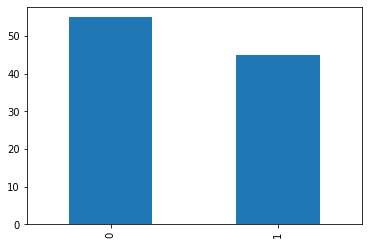

In [16]:
(df.label.value_counts()/len(df['label'])*100).plot.bar()

In [17]:
# Target variable label is balanced

In [18]:
#We are trying to find a relationship between frequency of authors and fake news

df1 = df['written_by'].value_counts().reset_index(name='count_author').rename(columns={'index': 'written_by'})

df2=pd.merge(df,df1,on=['written_by'], how='left' )

In [19]:
df2

,headline,written_by,news,label,count_author
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,2
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,14
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,243
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,13
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,5
...,...,...,...,...,...
18838,Get Ready For Civil Unrest: Survey Finds That ...,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1,1
18839,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,1
18840,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,85
18841,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,1


In [20]:
df2.written_by.value_counts()

Pam Key                                             243
admin                                               193
Jerome Hudson                                       166
Charlie Spiering                                    141
John Hayward                                        140
                                                   ... 
Dawn Perlmutter                                       1
Jonathan Martin, Maggie Haberman and Amy Chozick      1
Jacqueline Williams                                   1
Joseph Goldstein and Andy Newman                      1
Patrick G. Eddington                                  1
Name: written_by, Length: 4201, dtype: int64

In [21]:
df2.count_author.value_counts()

1     2615
2      950
3      651
4      620
5      545
      ... 
60      60
28      56
56      56
49      49
46      46
Name: count_author, Length: 89, dtype: int64

In [22]:
# checking any trend of frequency of authory and fake news through scatter plot

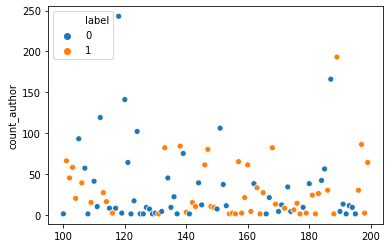

In [23]:
sns.scatterplot(x=df2.index,y=df2['count_author'][100:200],hue=df2['label'])

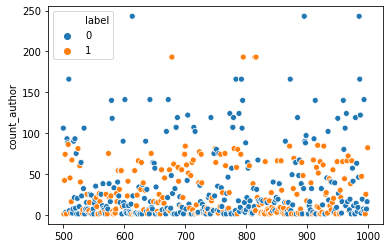

In [24]:
sns.scatterplot(x=df2.index,y=df2['count_author'][500:1000],hue=df2['label'])

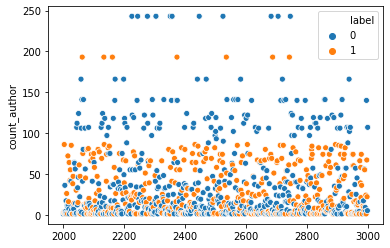

In [25]:
sns.scatterplot(x=df2.index,y=df2['count_author'][2000:3000],hue=df2['label'])

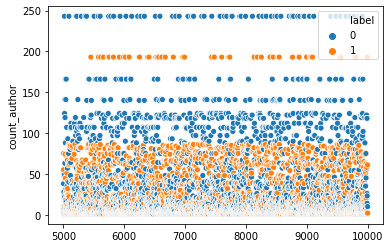

In [26]:
sns.scatterplot(x=df2.index,y=df2['count_author'][5000:10000],hue=df2['label'])

In [27]:
# From the above graph we obsevered there is no relationship betweem frequency of authors and fake news

In [28]:
df3=df2[df2['written_by'].str.match('Pam Key')]

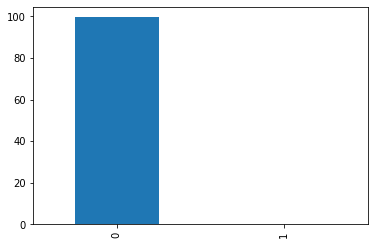

In [29]:
(df3.label.value_counts()/len(df3['label'])*100).plot.bar()

In [30]:
df4=df2[df2['written_by'].str.match('admin')]

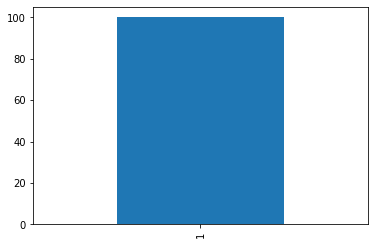

In [31]:
(df4.label.value_counts()/len(df4['label'])*100).plot.bar()

In [32]:
# We see news send by author admin are all fake

In [33]:
df5=df2[df2['written_by'].str.match('Jerome Hudson')]

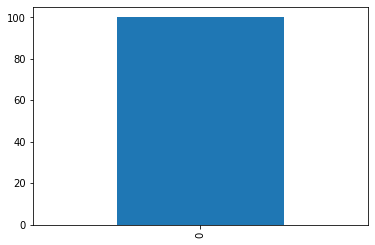

In [34]:
(df5.label.value_counts()/len(df5['label'])*100).plot.bar()

In [35]:
df6=df2[df2['written_by'].str.match('Charlie Spiering')]

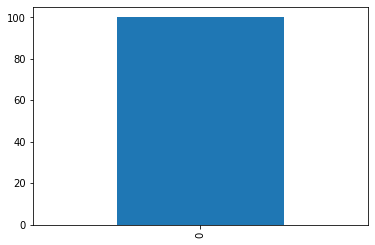

In [36]:
(df6.label.value_counts()/len(df6['label'])*100).plot.bar()

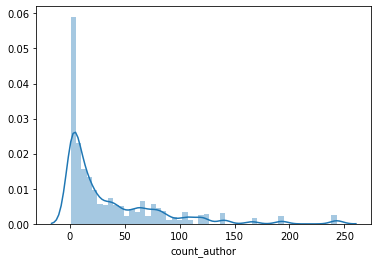

In [37]:
sns.distplot(df2['count_author'])

In [38]:
# high frequency is less



In [39]:
# Now its clean our texts column wise and count the lenght and then check any realtion between lenght and fake news

In [40]:
#New column for Length of message
df2['length_headline'] = df2.headline.str.len()
df2.head(2)

,headline,written_by,news,label,count_author,length_headline
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,2,84
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,14,72


In [41]:
df2['length_news'] = df2.news.str.len()
df2.head(2)

,headline,written_by,news,label,count_author,length_headline,length_news
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,2,84,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,14,72,6112


In [42]:
df2['headline'] = df2['headline'].str.lower()

In [43]:
df2['written_by']=df2['written_by'].str.lower()

In [44]:
df2['news']=df2['news'].str.lower()

In [45]:
df2

,headline,written_by,news,label,count_author,length_headline,length_news
0,ethics questions dogged agriculture nominee as...,eric lipton and steve eder,"washington — in sonny perdue’s telling, geo...",0,2,84,7936
1,u.s. must dig deep to stop argentina’s lionel ...,david waldstein,houston — venezuela had a plan. it was a ta...,0,14,72,6112
2,cotton to house: ’do not walk the plank and vo...,pam key,"sunday on abc’s “this week,” while discussing ...",0,243,100,425
3,"paul lepage, besieged maine governor, sends co...",jess bidgood,"augusta, me. — the beleaguered republican g...",0,13,100,6516
4,a digital 9/11 if trump wins,finian cunningham,finian cunningham has written extensively on...,1,5,28,9164
...,...,...,...,...,...,...,...
18838,get ready for civil unrest: survey finds that ...,neversurrender,"no, you'll be a dog licking of the vomit of yo...",1,1,98,69
18839,albert pike and the european migrant crisis,rixon stewart,"by rixon stewart on november 5, 2016 rixon ste...",1,1,43,6621
18840,dakota access caught infiltrating protests to ...,eddy lavine,posted by eddie you know the dakota access pip...,1,85,84,3433
18841,how to stretch the summer solstice - the new y...,alison s. cohn,"it’s officially summer, and the society boutiq...",0,1,55,2334


In [46]:
# Now we'll clean headline, written_by and news columns one by one.

In [47]:
df2['news'] = df2['news'].str.replace(r'[^\w\d\s]', ' ')
df2['news'] = df2['news'].str.replace("\n", ' ')
# Replace whitespace between terms with a single space
df2['news'] = df2['news'].str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
df2['news'] =df2['news'].str.replace(r'^\s+|\s+?$', '')

In [48]:
df2['headline'] = df2['headline'].str.replace(r'[^\w\d\s]', ' ')
df2['headline'] = df2['headline'].str.replace("\n", ' ')
# Replace whitespace between terms with a single space
df2['headline'] = df2['headline'].str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
df2['headline'] =df2['headline'].str.replace(r'^\s+|\s+?$', '')

In [49]:
df2['written_by'] = df2['written_by'].str.replace(r'[^\w\d\s]', ' ')
df2['written_by'] = df2['written_by'].str.replace("\n", ' ')
# Replace whitespace between terms with a single space
df2['written_by'] = df2['written_by'].str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
df2['written_by'] =df2['written_by'].str.replace(r'^\s+|\s+?$', '')

In [50]:
#move stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df2['news'] = df2['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [51]:
#move stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df2['headline'] = df2['headline'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [52]:
#move stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df2['headline'] = df2['headline'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [53]:
df2

,headline,written_by,news,label,count_author,length_headline,length_news
0,ethics questions dogged agriculture nominee ge...,eric lipton and steve eder,washington sonny perdue telling georgians grow...,0,2,84,7936
1,must dig deep stop argentina lionel messi new ...,david waldstein,houston venezuela plan tactical approach desig...,0,14,72,6112
2,cotton house walk plank vote bill cannot pass ...,pam key,sunday abc week discussing republican plan rep...,0,243,100,425
3,paul lepage besieged maine governor sends conf...,jess bidgood,augusta beleaguered republican governor maine ...,0,13,100,6516
4,digital 9 11 trump wins,finian cunningham,finian cunningham written extensively internat...,1,5,28,9164
...,...,...,...,...,...,...,...
18838,get ready civil unrest survey finds americans ...,neversurrender,dog licking vomit chinese overlords,1,1,98,69
18839,albert pike european migrant crisis,rixon stewart,rixon stewart november 5 2016 rixon stewart no...,1,1,43,6621
18840,dakota access caught infiltrating protests inc...,eddy lavine,posted eddie know dakota access pipeline prote...,1,85,84,3433
18841,stretch summer solstice new york times,alison s cohn,officially summer society boutique society mem...,0,1,55,2334


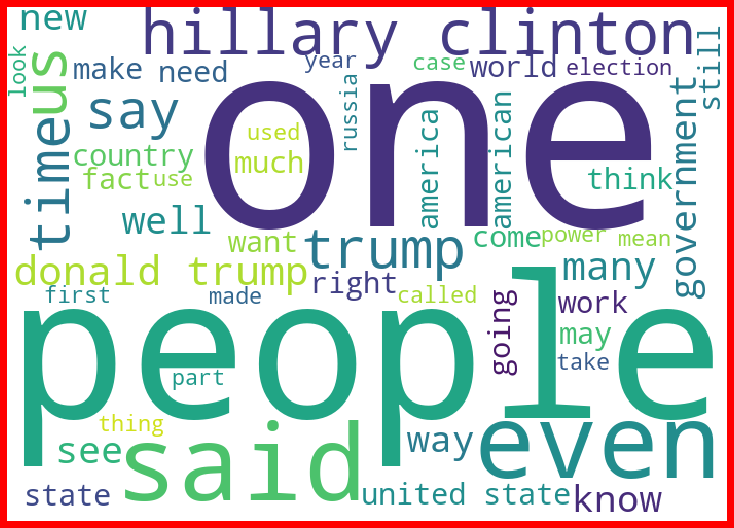

In [54]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


fake = df2['news'][df2['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [55]:
# Mostly fake news consist of people and said words, also every news related Hillary Clinton are also seems to be fake

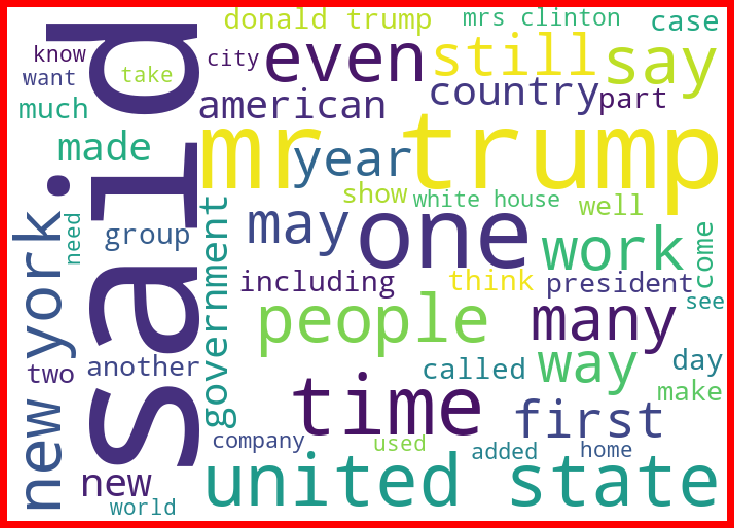

In [56]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


fake = df2['news'][df2['label']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [57]:
# mostly news related to politics are there and news consisting Donald Trump are seemed to be true.

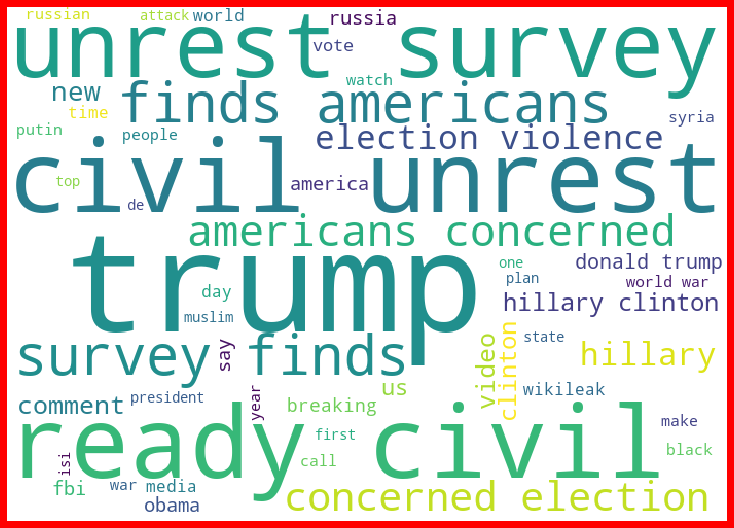

In [58]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


fake = df2['headline'][df2['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

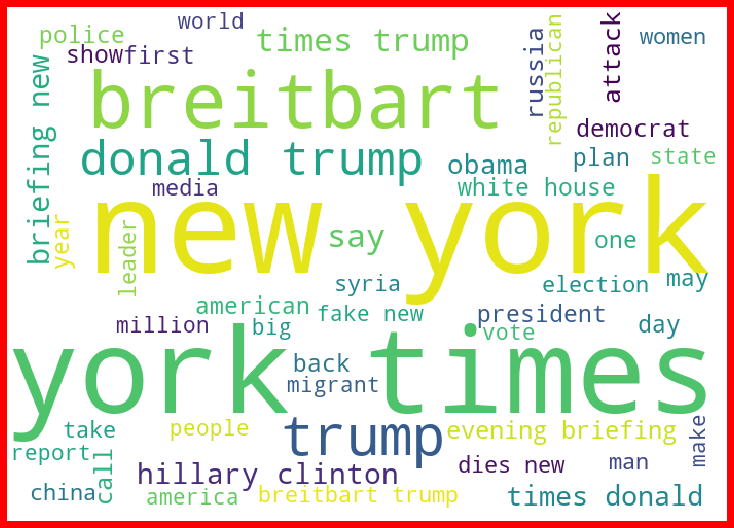

In [59]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


fake = df2['headline'][df2['label']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

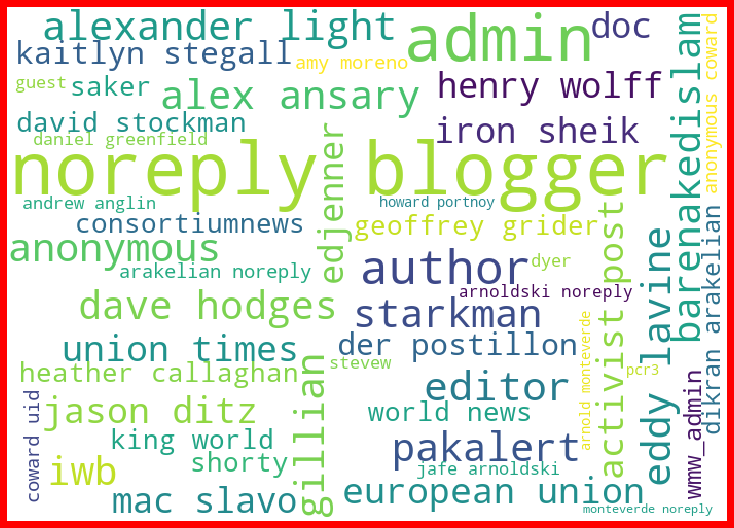

In [60]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


fake = df2['written_by'][df2['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [61]:
# authors having no name are seemed to be fake

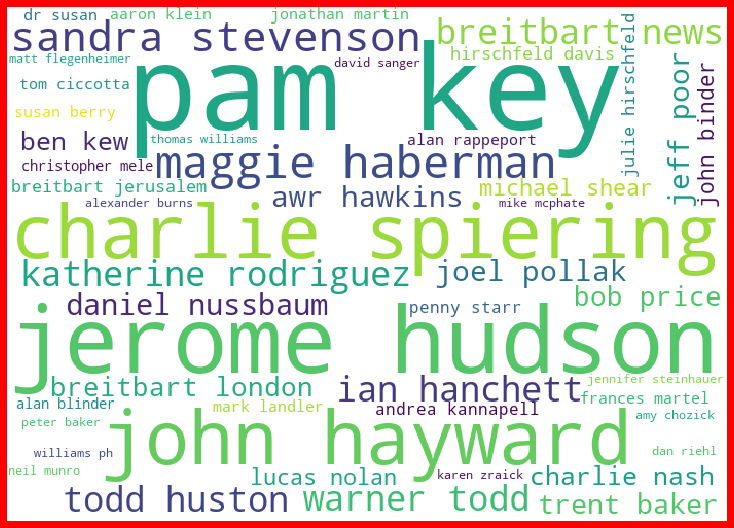

In [62]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


fake = df2['written_by'][df2['label']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [63]:
# News from authors pam key , jerome hudson are seemed to be true

In [64]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df2['news'])

X = features
y = df2['label']

## MultinomialNB

In [65]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.7811504988325196


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2617
           1       1.00      0.51      0.67      2094

    accuracy                           0.78      4711
   macro avg       0.86      0.75      0.75      4711
weighted avg       0.84      0.78      0.76      4711



# Random Search

In [69]:
from sklearn.model_selection import RandomizedSearchCV

### knn

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
param_grid ={
    'n_neighbors':[1,2,3,4,5],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}


gd_sr = RandomizedSearchCV(estimator=knn,
                    param_distributions=param_grid,
                    scoring='accuracy',cv=5)

gd_sr.fit(X,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'weights': 'distance', 'n_neighbors': 2, 'algorithm': 'auto'}
0.5863715968794778


### RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gd_sr = RandomizedSearchCV(estimator=rf,
                    param_distributions=param_grid,
                    scoring='accuracy',cv=5)
gd_sr.fit(X,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}
0.8257708432839781


### DecisionTree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini','entropy']
}

#gridk = {'kernel' :['linear','rbf','ploy']}
gd_sr = RandomizedSearchCV(estimator=dtc,
                    param_distributions=grid_param,
                    scoring='accuracy')
gd_sr.fit(X,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.8871729554741814


# Models

### Knn

In [76]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=2 ,weights='distance',algorithm='auto')
Knn.fit(X_train,Y_train)
predknn = Knn.predict(x_test)
predknn
print('accuracy_score',accuracy_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score 0.5786457227764806
[[ 657 1960]
 [  25 2069]]
              precision    recall  f1-score   support

           0       0.96      0.25      0.40      2617
           1       0.51      0.99      0.68      2094

    accuracy                           0.58      4711
   macro avg       0.74      0.62      0.54      4711
weighted avg       0.76      0.58      0.52      4711



### RandomForest

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_features ='sqrt',max_depth = 8,criterion='entropy')

rf.fit(X_train,Y_train)
predrf = rf.predict(x_test)
predrf

print('predicted',predrf)
print('actual',y_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

predicted [0 0 1 ... 0 0 1]
actual 12862    0
4638     1
11859    1
1383     0
3595     1
        ..
16053    0
16789    0
15684    0
7589     0
18631    1
Name: label, Length: 4711, dtype: int64
0.8376140946720442
[[2538   79]
 [ 686 1408]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2617
           1       0.95      0.67      0.79      2094

    accuracy                           0.84      4711
   macro avg       0.87      0.82      0.83      4711
weighted avg       0.86      0.84      0.83      4711



In [84]:
rfscores=cross_val_score(rf,X=X_train,y=Y_train,cv=5,scoring='accuracy')
print(rfscores)
print(rfscores.mean()*100,rfscores.std()*100)

[0.82313406 0.81429077 0.81818182 0.83545648 0.83221239]
82.46551030247149 0.8067448794729348


### DecisionTree

In [78]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy')
dct.fit(X_train,Y_train)
preddct = dct.predict(x_test)
preddct
print('accuracy_score',accuracy_score(preddct,y_test))
print(confusion_matrix(y_test,preddct))
print(classification_report(y_test,preddct))

accuracy_score 0.8957758437699003
[[2372  245]
 [ 246 1848]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2617
           1       0.88      0.88      0.88      2094

    accuracy                           0.90      4711
   macro avg       0.89      0.89      0.89      4711
weighted avg       0.90      0.90      0.90      4711



In [80]:
from sklearn.model_selection import cross_val_score

In [82]:
dctscores=cross_val_score(dct,X=X_train,y=Y_train,cv=5,scoring='accuracy')
print(dctscores)
print(dctscores.mean()*100,dctscores.std()*100) 

[0.88291475 0.87690131 0.88539087 0.88428875 0.87964602]
88.18283396379726 0.3129335578818224


In [86]:
list1=[accuracy_score(y_test,y_pred),accuracy_score(predknn,y_test),accuracy_score(y_test,predrf),accuracy_score(preddct,y_test)]

In [87]:
list2=['MultinimialNB','Knn','RandomForest','DecisionTree']

In [88]:
model_performance=pd.DataFrame(list(zip(list2,list1)),columns=['Model','Test_score'])

In [89]:
model_performance

,Model,Test_score
0,MultinimialNB,0.781150
1,Knn,0.578646
2,RandomForest,0.837614
3,DecisionTree,0.895776


In [90]:
#DecisionTree is our best performing model.